###Spine Detection

In [ ]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

fatal: destination path 'yolov9' already exists and is not an empty directory.
/content/yolov9


In [ ]:
import os
%cd yolov9
HOME = os.getcwd()
print(HOME)

[Errno 2] No such file or directory: 'yolov9'
/content/yolov9
/content/yolov9


In [ ]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [ ]:
!ls -la {HOME}/weights

total 503180
drwxr-xr-x  2 root root      4096 Apr 11 03:48 .
drwxr-xr-x 12 root root      4096 Apr 11 03:46 ..
-rw-r--r--  1 root root  51508261 Feb 18 12:36 gelan-c.pt
-rw-r--r--  1 root root 117203713 Feb 18 12:36 gelan-e.pt
-rw-r--r--  1 root root 103153312 Feb 18 12:36 yolov9-c.pt
-rw-r--r--  1 root root 103153312 Feb 18 12:36 yolov9-c.pt.1
-rw-r--r--  1 root root 140217688 Feb 18 12:36 yolov9-e.pt


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="your-API_-KEY")
project = rf.workspace("work-qfeh4").project("spines-kw7n6")
version = project.version(3)
dataset = version.download("yolov9")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.1

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to spines-3 in yolov9:: 100%|██████████| 3330/3330 [00:00<00:00, 7444.21it/s]


In [ ]:
%cd /content/yolov9

!python train_dual.py \
--batch 65 --epochs 20 --img 416 --device 0 --min-items 0 \
--data /content/yolov9/spines-3/data.yaml \
--weights /content/drive/MyDrive/Colab_Notebooks/yolov9_model_output/yolov9_best.pt \
--cfg models/detect/yolov9-c.yaml \
--hyp hyp.scratch-high.yaml


In [ ]:
!ls /content/yolov9/runs/train/exp

confusion_matrix.png				    PR_curve.png	   val_batch0_pred.jpg
events.out.tfevents.1711933831.5b1a7d2ee81a.2313.0  R_curve.png		   val_batch1_labels.jpg
F1_curve.png					    results.csv		   val_batch1_pred.jpg
hyp.yaml					    results.png		   val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch0.jpg	   val_batch2_pred.jpg
labels.jpg					    train_batch1.jpg	   weights
opt.yaml					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg


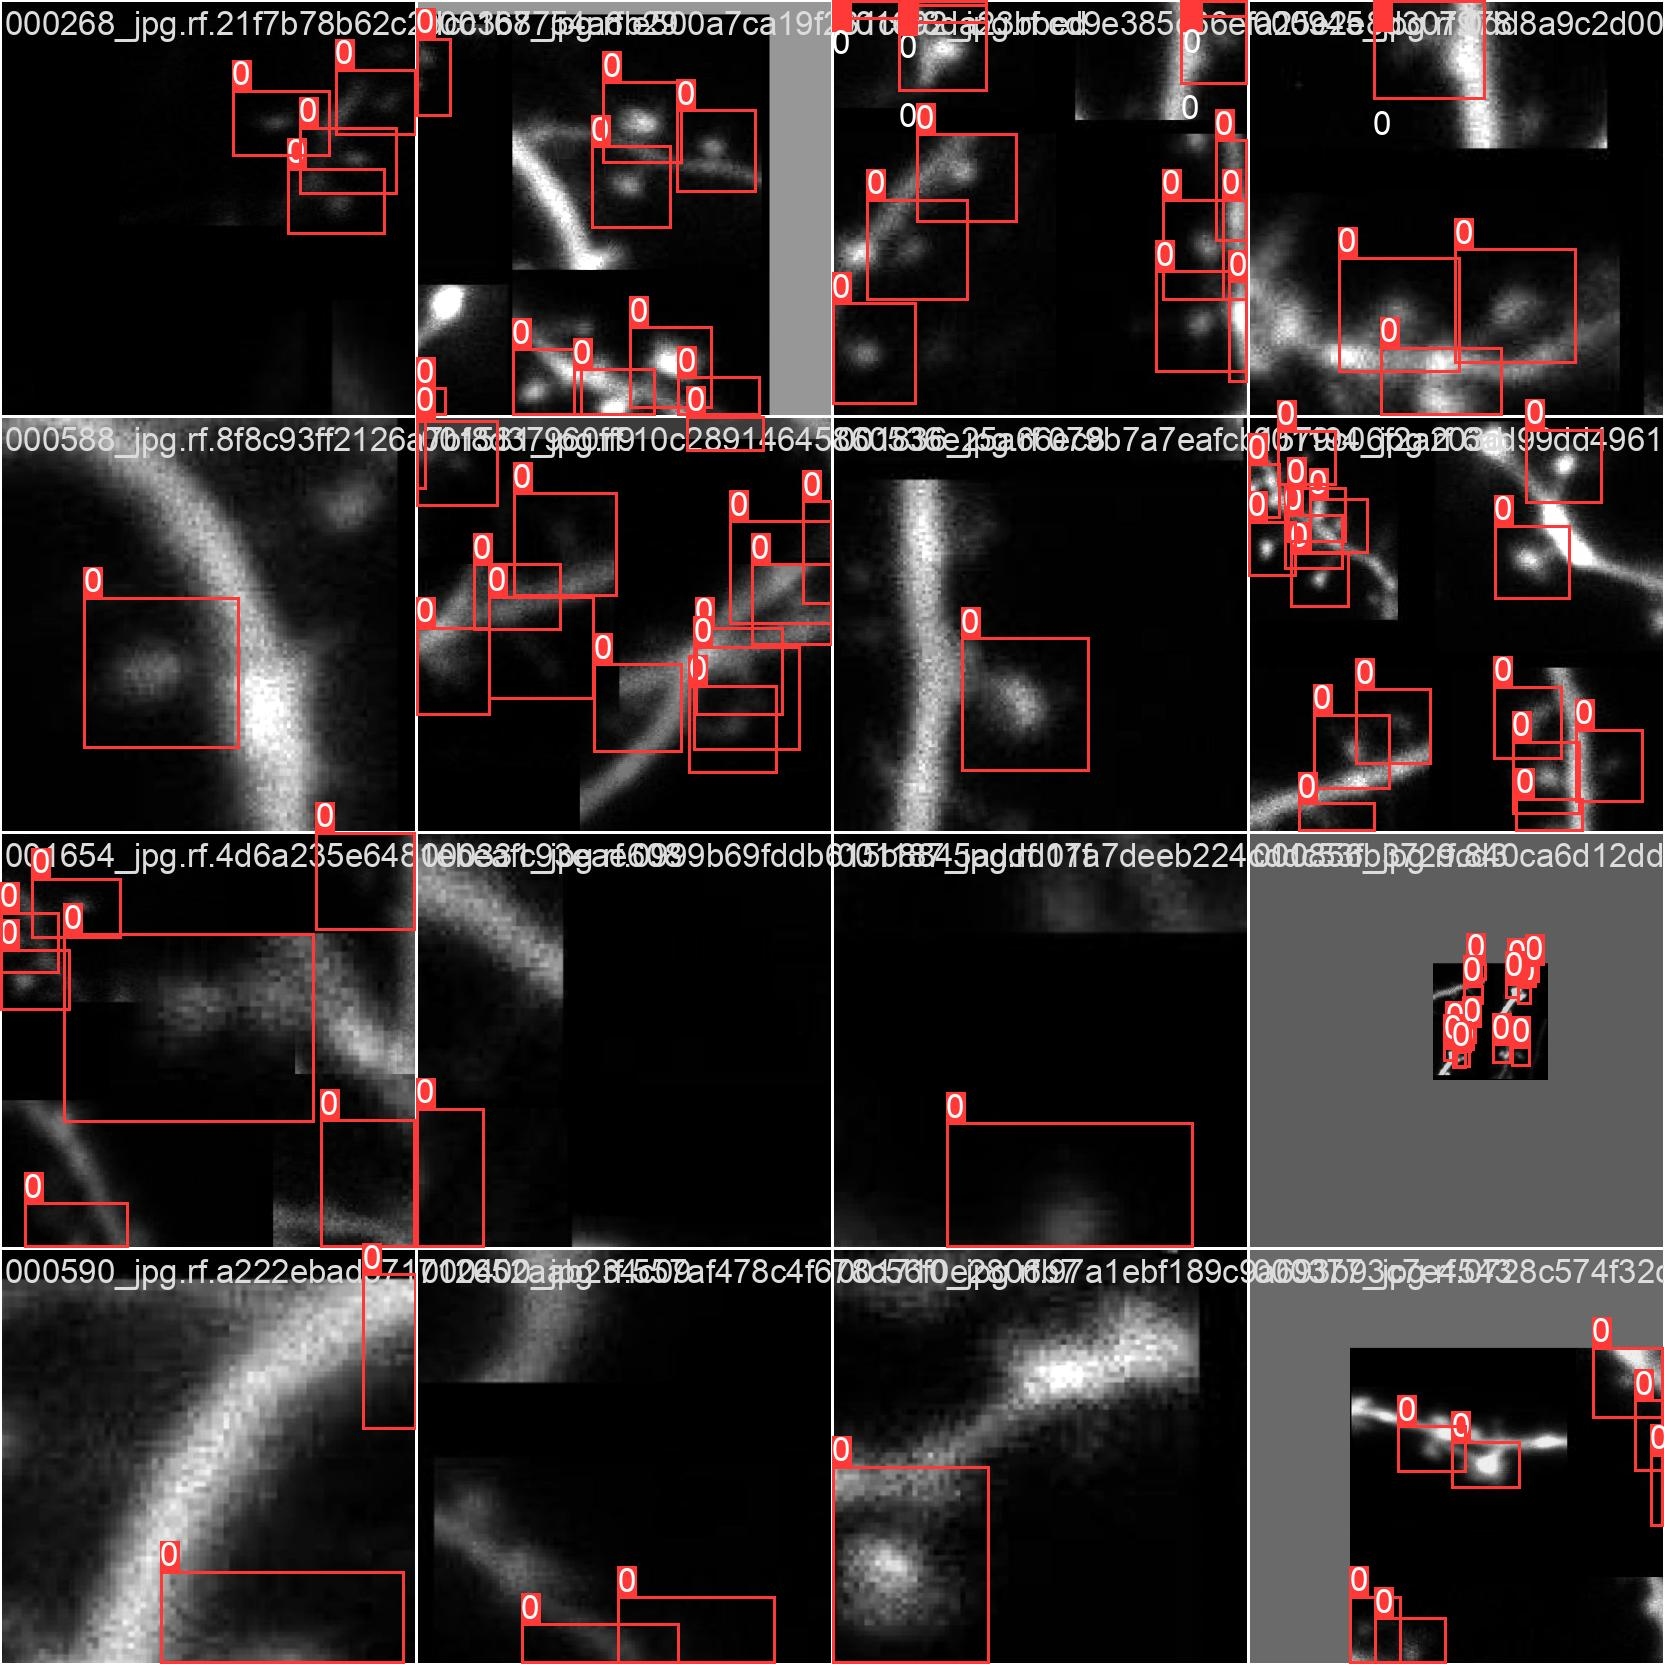

In [ ]:
from IPython.display import Image

Image(filename=f"/content/yolov9/runs/train/exp/train_batch0.jpg", width=1000)

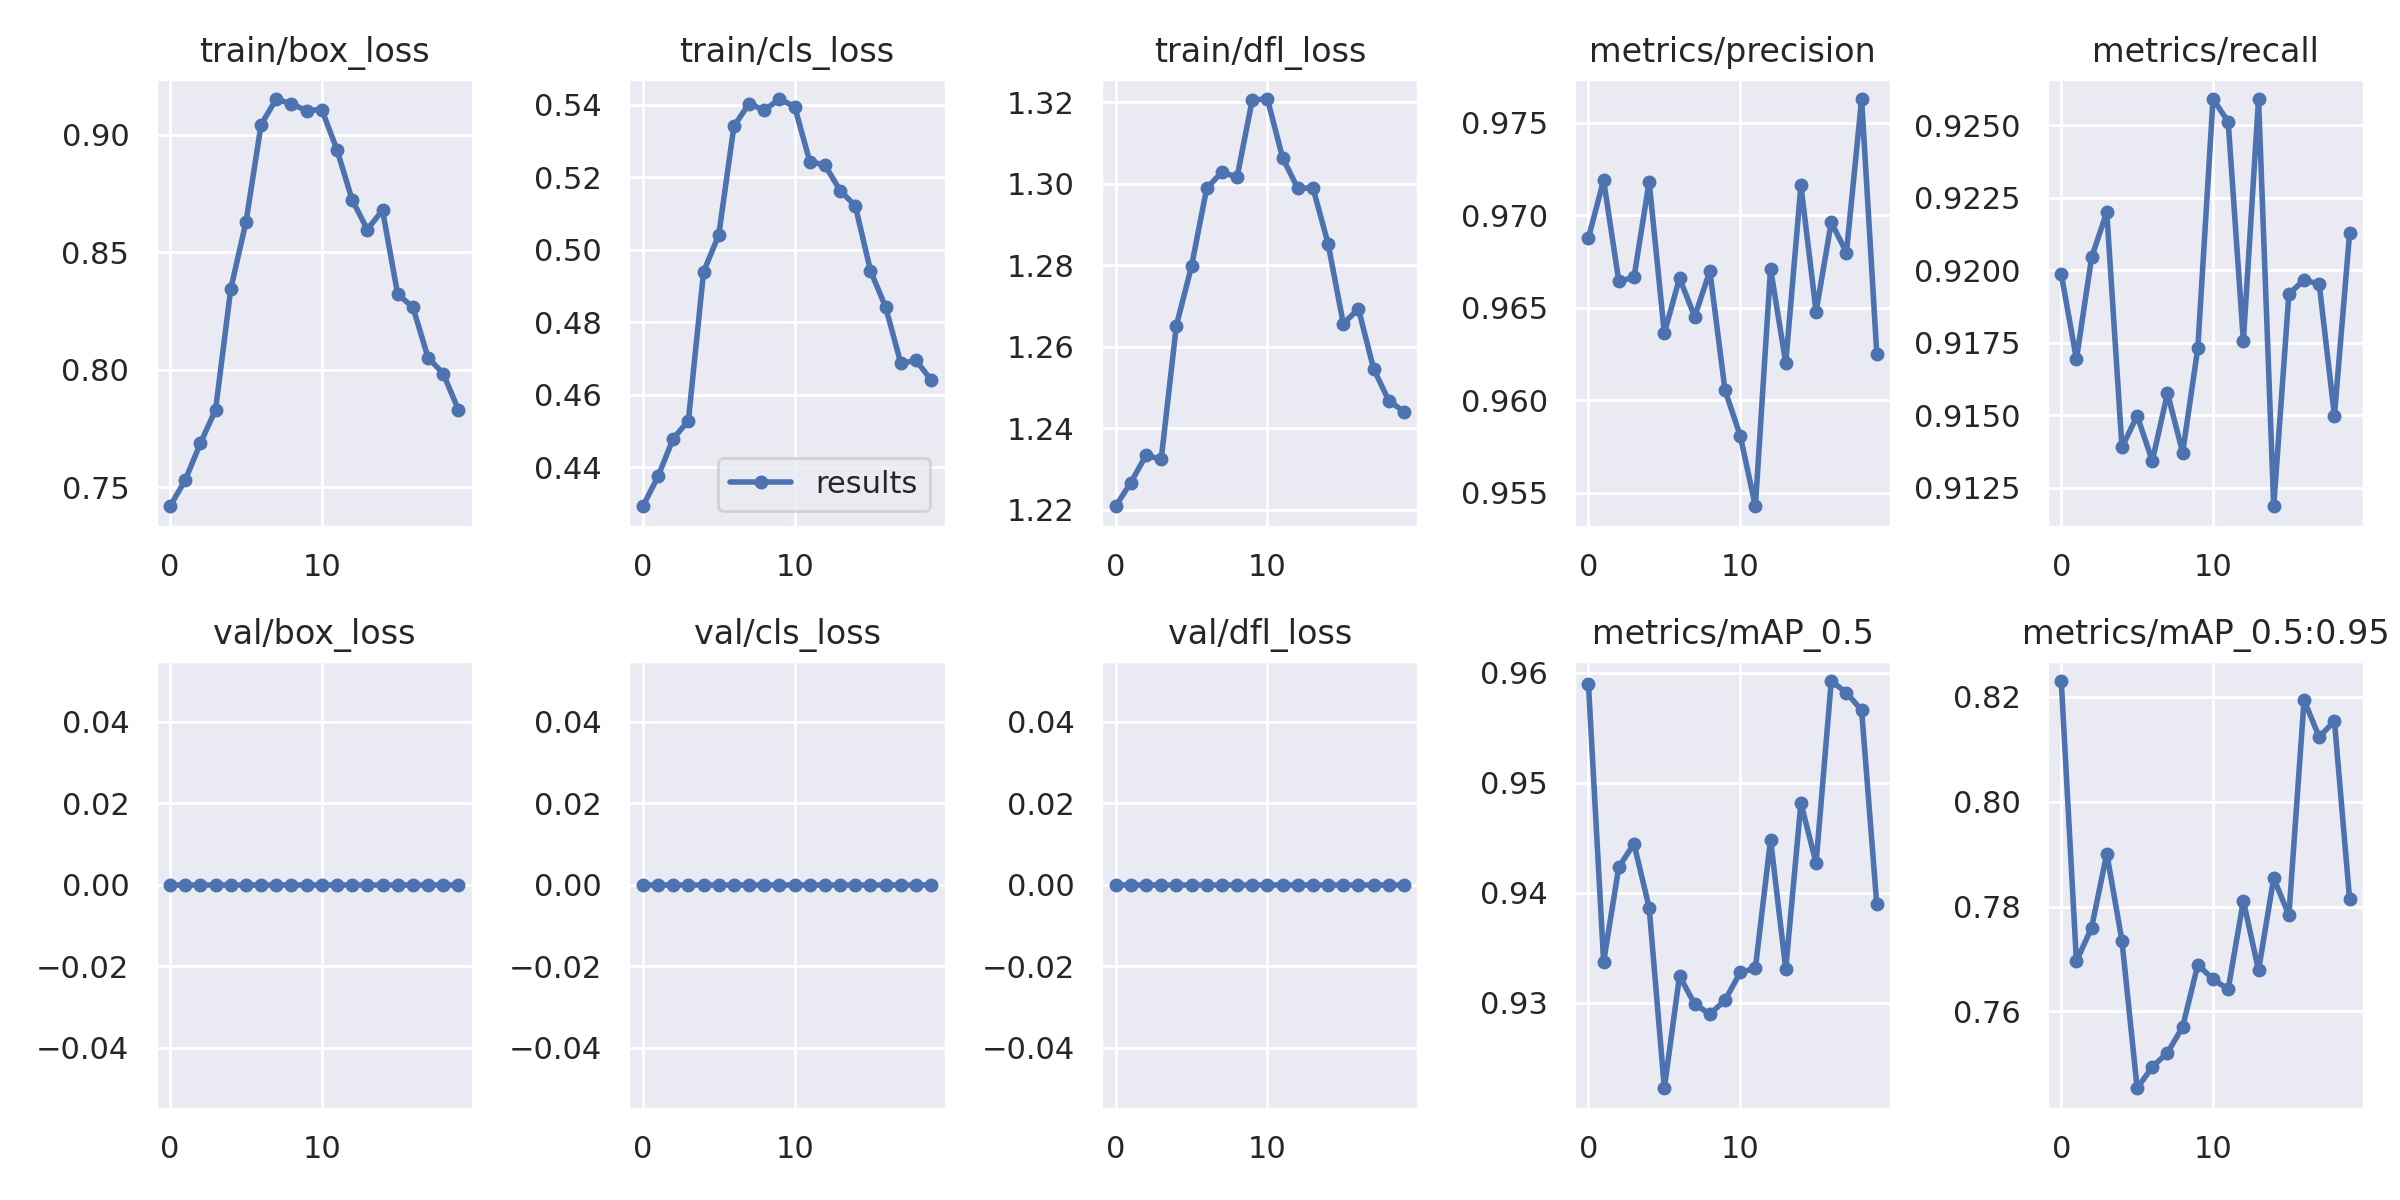

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/runs/train/exp/results.png", width=1000)

In [ ]:
%cd {HOME}

!python val.py \
--img 640 --batch 16 --conf 0.001 --iou 0.7 --device 0 \
--data {dataset.location}/data.yaml \
--weights /content/yolov9/runs/train/exp/weights/best.pt

/content/yolov9
val: data=/content/yolov9/spines-3/data.yaml, weights=['/content/yolov9/runs/train/exp/weights/best.pt'], batch_size=16, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
yolov9-c summary: 724 layers, 50958630 parameters, 0 gradients, 237.6 GFLOPs
val: Scanning /content/yolov9/spines-3/valid/labels.cache... 332 images, 0 backgrounds, 0 corrupt: 100% 332/332 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 21/21 [00:08<00:00,  2.46it/s]
                   all        332       1282      0.965       0.91      0.939      0.778
Speed: 0.2ms pre-process, 10.3ms inference, 7.1m

In [ ]:
!python detect.py \
--img 640 --conf 0.001 --device 0 \
--weights /content/yolov9/runs/train/exp/weights/best.pt \
--source {dataset.location}/test/images

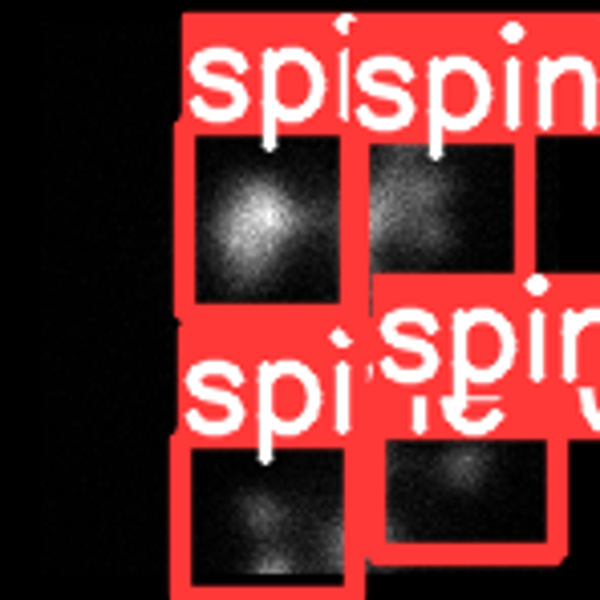

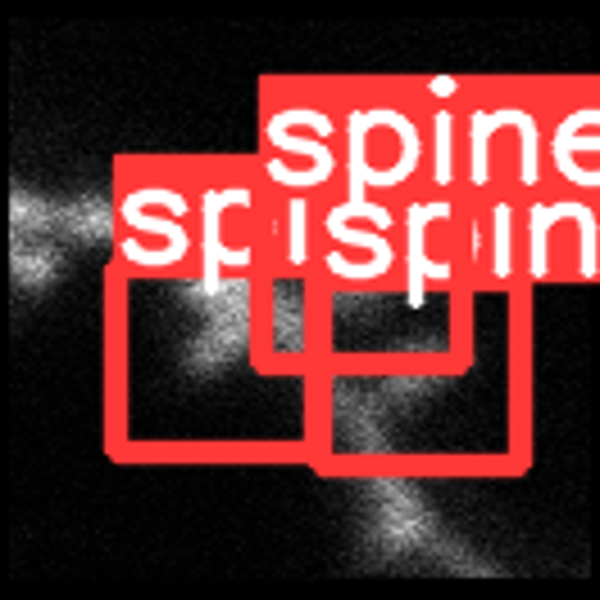

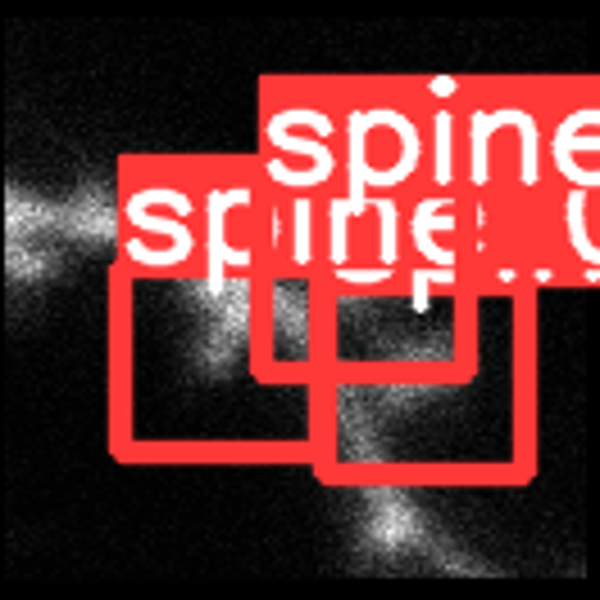

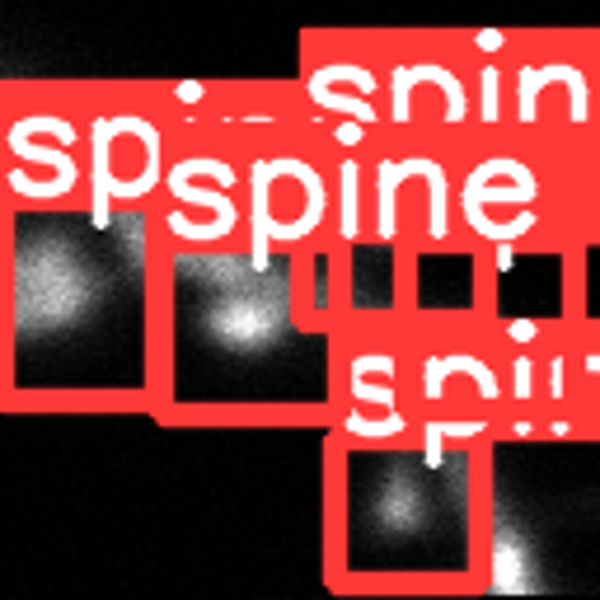

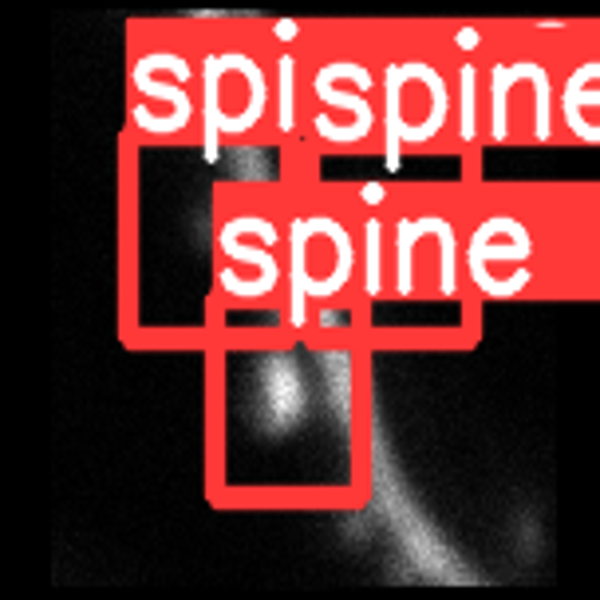

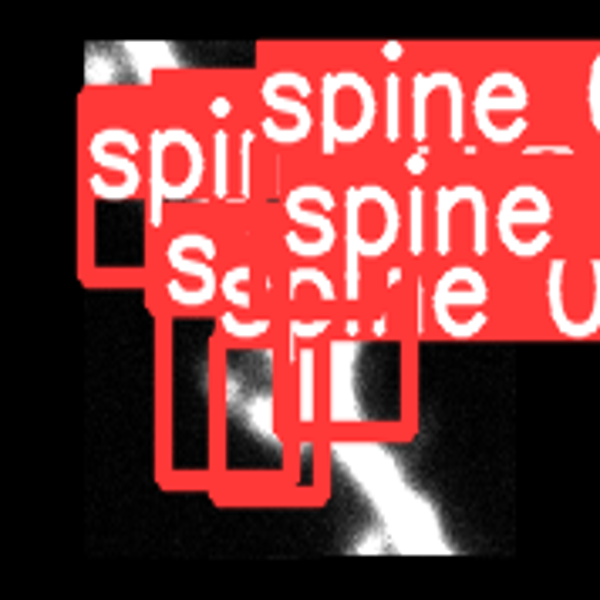

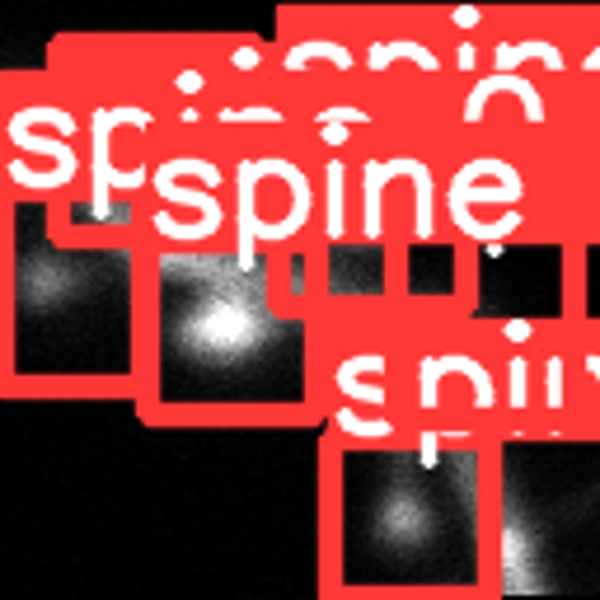

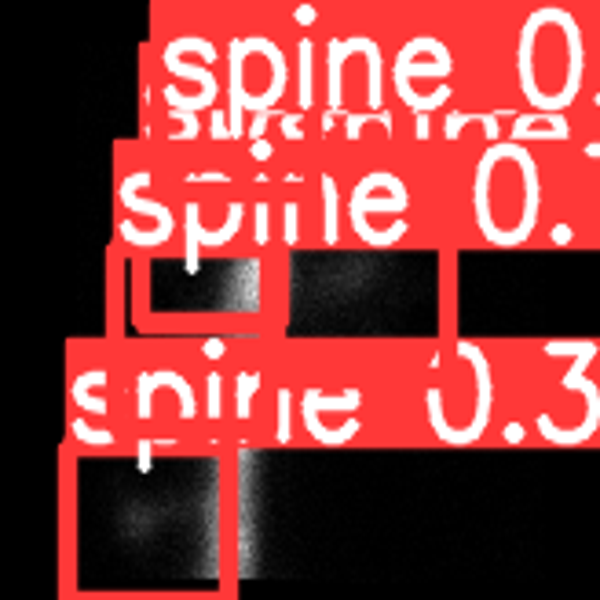

In [ ]:
from PIL import Image
import glob


for image_path in glob.glob(f'{HOME}/runs/detect/exp/*.tif')[2:10]:
    img = Image.open(image_path)
    img = img.resize((600, 600))
    display(img)


###Distance/Density/Surface_Area

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!python /content/yolov9/detect.py \
--img 640 --conf 0.254 --device 0 \
--weights /content/drive/MyDrive/Colab_Notebooks/yolov9_model_output/yolov9_second_run.pt \
--source /content/drive/MyDrive/Colab_Notebooks/Labeled_Spines_SmirnovEtAl2018/images\
--save-txt

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize

def process_images(image_folder, annotation_folder, output_folder):
    image_files = sorted([os.path.join(image_folder, file) for file in os.listdir(image_folder)])
    annotation_files = sorted([os.path.join(annotation_folder, file) for file in os.listdir(annotation_folder)])

    for image_file, annotation_file in zip(image_files, annotation_files):
        image = cv2.imread(image_file)
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        #get bboxes from annotation files
        with open(annotation_file, 'r') as file:
            lines = file.readlines()
        normalized_bounding_boxes = []
        for line in lines:
            parts = line.split()
            if len(parts) == 5:
                bbox = tuple(map(float, parts[1:]))
                normalized_bounding_boxes.append(bbox)

        #convert bboxes to pixel coordinates
        def convert_to_pixel_coordinates(bbox, image_shape):
            height, width = image_shape[:2]
            x_center_norm, y_center_norm, width_norm, height_norm = bbox
            x_center = int(x_center_norm * width)
            y_center = int(y_center_norm * height)
            width = int(width_norm * width)
            height = int(height_norm * height)
            x = x_center - width // 2
            y = y_center - height // 2
            return x, y, width, height

        original_bounding_boxes = [convert_to_pixel_coordinates(bbox, image.shape) for bbox in normalized_bounding_boxes]

        #fill boxes with background color
        def fill_boxes_with_background(image, bounding_boxes):
            bg_filled_image = image.copy()
            for bbox in bounding_boxes:
                x, y, w, h = bbox
                x, y, w, h = int(x), int(y), int(w), int(h)
                bg_filled_image[y:y+h, x:x+w] = 0
            return bg_filled_image

        #shrink boxes to fit tighter around spines
        new_bounding_boxes = [
            (x + w//4, y + h//4, w//2, h//2) for x, y, w, h in original_bounding_boxes
        ]

        bg_filled_image = fill_boxes_with_background(gray_image, new_bounding_boxes)

        #preprocess image and skeletonize
        def preprocess_image(image):
            denoised = cv2.medianBlur(image, 9)
            _, global_thresh = cv2.threshold(denoised, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
            skeletonized_image = skeletonize(global_thresh / 255)
            return skeletonized_image.astype(np.uint8)

        #trace line over skeleton by going from pixel to pixel
        def trace_line(thinned_image, window_size):
            traced_lines = []
            visited = np.zeros(thinned_image.shape, dtype=bool)
            height, width = thinned_image.shape
            for y in range(height):
                for x in range(width):
                    if thinned_image[y, x] > 0 and not visited[y, x]:
                        current_pixel = (y, x)
                        traced_line = []
                        traced_line.append(current_pixel)
                        visited[y, x] = True
                        offsets = [(dy, dx) for dy in range(-window_size, window_size + 1) for dx in range(-window_size, window_size + 1)]
                        while True:
                            connected_pixels = [(current_pixel[0] + dy, current_pixel[1] + dx) for dy, dx in offsets]
                            connected_pixels = [(y, x) for y, x in connected_pixels if 0 <= y < height and 0 <= x < width]
                            connected_pixels = [(y, x) for y, x in connected_pixels if thinned_image[y, x] > 0 and not visited[y, x]]
                            if not connected_pixels:
                                break
                            current_pixel = connected_pixels[0]
                            traced_line.append(current_pixel)
                            visited[current_pixel[0], current_pixel[1]] = True
                        traced_lines.append(traced_line)
                        break
            longest_line = max(traced_lines, key=len)
            return np.array(longest_line)

        thinned_image = preprocess_image(bg_filled_image)

        def calculate_center(bbox):
            x, y, w, h = bbox
            return x + w / 2, y + h / 2

        bounding_box_centers = [calculate_center(bbox) for bbox in original_bounding_boxes]

        #find best window size by finding shortest distances
        divisor_values = list(range(10, 31))
        best_window_size = None
        best_distance_scaled = float('inf')
        for divisor in divisor_values:
            window_size = max(thinned_image.shape) // divisor
            traced_line = trace_line(thinned_image, window_size)
            distances_pixels = []
            for center in bounding_box_centers:
                distances = np.linalg.norm(traced_line - np.array(center[::-1]), axis=1)
                distances_pixels.append(np.min(distances))
            distances_scaled = [distance_pixel / 15.36 for distance_pixel in distances_pixels]
            max_scaled_distance = max(distances_scaled)
            if max_scaled_distance < best_distance_scaled:
                best_distance_scaled = max_scaled_distance
                best_window_size = window_size

        final_window_size = best_window_size
        traced_line = trace_line(thinned_image, final_window_size)

        mask = np.zeros_like(image[:,:,0])

        #Masking the image with background color, except for the bboxes
        for bbox in new_bounding_boxes:
            x, y, w, h = bbox
            sub_image = gray_image[y:y+h, x:x+w]
            smoothed_sub_image = cv2.GaussianBlur(sub_image, (5, 5), 0)
            _, thresholded = cv2.threshold(smoothed_sub_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
            mask[y:y+h, x:x+w] = thresholded

        masked_image = cv2.bitwise_and(image, cv2.merge([mask]*3))

        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        restored_image = np.where(mask[..., None] == 255, image, image)


        #finding nearest points
        nearest_points = []
        for center in bounding_box_centers:
            distances = np.linalg.norm(traced_line - np.array(center[::-1]), axis=1)
            nearest_point_index = np.argmin(distances)
            nearest_point = traced_line[nearest_point_index]
            nearest_points.append(nearest_point[::-1])

        spine_count = len(bounding_box_centers)
        traced_line_length_pixels = np.sum(np.sqrt(np.sum(np.diff(traced_line, axis=0) ** 2, axis=1))) / 15.36
        density = spine_count / traced_line_length_pixels


        output_file = os.path.join(output_folder, f"{os.path.splitext(os.path.basename(image_file))[0]}.png")
        cv2.imwrite(output_file, restored_image)


        plt.imshow(restored_image)
        plt.axis('off')
        plt.plot(traced_line[:, 1], traced_line[:, 0], 'b-', linewidth=2)


        for bbox in new_bounding_boxes:
            x, y, w, h = bbox
            cv2.rectangle(mask, (int(x), int(y)), (int(x + w), int(y + h)), (255, 255, 255), -1)

        for bbox, nearest_point, scaled_distance in zip(original_bounding_boxes, nearest_points, distances_scaled):
            x, y, w, h = bbox
            center_x, center_y = x + w / 2, y + h / 2
            plt.plot(center_x, center_y, 'ro')
            plt.plot([center_x, nearest_point[0]], [center_y, nearest_point[1]], 'r--', linewidth=1)
            plt.plot(nearest_point[0], nearest_point[1], 'go')
            plt.text(nearest_point[0], nearest_point[1], f"{scaled_distance:.2f}", color='yellow', fontsize=8, ha='center', va='center')


        for contour in contours:
            area_px = cv2.contourArea(contour)
            area_um2 = area_px / 15.36**2
            #filter out mistakes
            if area_px == 0:
                continue
            else:
              x, y, w, h = cv2.boundingRect(contour)

              #would have plotted using cv2.drawcontour but cv2 plotting doesnt seem to work with matplotlib
              contour = contour.squeeze(axis=1)
              plt.plot(contour[:, 0], contour[:, 1], 'r-', linewidth=1)
              plt.text(x + w // 2, y + h // 2, f'{area_um2:.2f}', color='white', fontsize=8, ha='center', va='center')


        plt.text(0.05, 0.05, f"Density: {density:.2f} spines/μm", color='white', fontsize=8, ha='left', va='bottom', transform=plt.gca().transAxes)

        plt.tight_layout()
        #plt.show()
        plt.savefig(output_file, transparent=True)
        plt.close()
        print(f"Processed image: {image_file}")


image_folder = "/content/drive/MyDrive/Colab_Notebooks/Labeled_Spines_SmirnovEtAl2018/images"
annotation_folder = '/content/drive/MyDrive/Colab_Notebooks/Labeled_Spines_SmirnovEtAl2018/labels'
output_folder = "/content/drive/MyDrive/Colab_Notebooks/Labeled_Spines_SmirnovEtAl2018/distance_density_surface_area_contours_images"
os.makedirs(output_folder, exist_ok=True)
process_images(image_folder, annotation_folder, output_folder)
